In [ ]:
from IPython.display import display
import pandas as pd

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

In [ ]:
report_dk = [{"value": 27, "product": "Subsistances", "destination": "fr"}, 
             {"value": 7, "product": "Subsistances", "destination": "colonies"}, 
             {"value": 37, "product": "Matières premières", "destination": "fr"}, 
             {"value": 70, "product": "Matières premières", "destination": "colonies"}, 
             {"value": 20, "product": "Drogues", "destination": "fr"}, 
             {"value": 29, "product": "Drogues", "destination": "colonies"}, 
            ]
my_other_source = [{"value": 27, "product": "Subsistances", "destination": "fr"}, 
             {"value": 7, "product": "Subsistances", "destination": "colonies"}, 
             {"value": 20, "product": "Matières premières", "destination": "fr"}, 
             {"value": 70, "product": "Matières premières", "destination": "other_field"}, 
             {"value": 40, "product": "Drogues", "destination": "fr"}, 
             {"value": 32, "product": "Drogues", "destination": "other_field"}, 
            ]

In [ ]:
for row in report_dk:
    row["group"] = "import"
for row in my_other_source:
    row["group"] = "export"
all_data = report_dk + my_other_source

In [89]:
import json

with open("data/export_dunkerque_entreprôt.json", "r") as f:
    report_dk = json.load(f)

In [90]:
report_dk[:2]

[{'value': 5872641.40022,
  'product': 'Other threads and fabrics',
  'partner': 'entrepôt',
  'group': 'export'},
 {'value': 27063.59978,
  'product': 'Other threads and fabrics',
  'partner': 'France',
  'group': 'export'}]

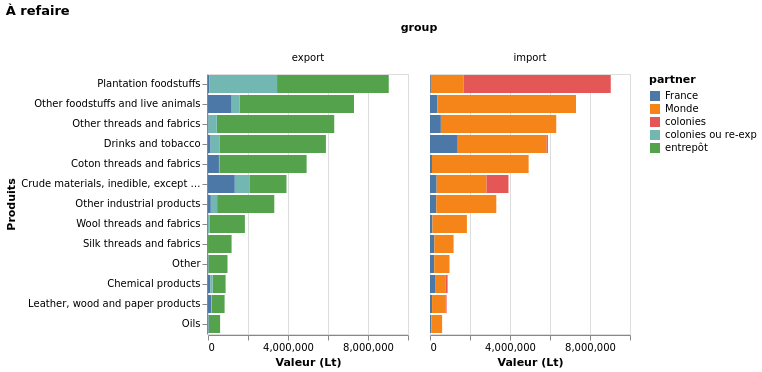

In [91]:
VegaLite({
  "title": "À refaire",
  "data": {"values": report_dk},
  "mark": {"type":"bar", "tooltip": {"content": "data"}},
  "encoding": {
    "x": {"field": "value", "type": "quantitative", "title": "Valeur (Lt)"},
    "column": {"field": "group"},
    "y": {"field": "product", "sort": "-x", "title": "Produits"},
    "color": {"field": "partner"}
  }
})

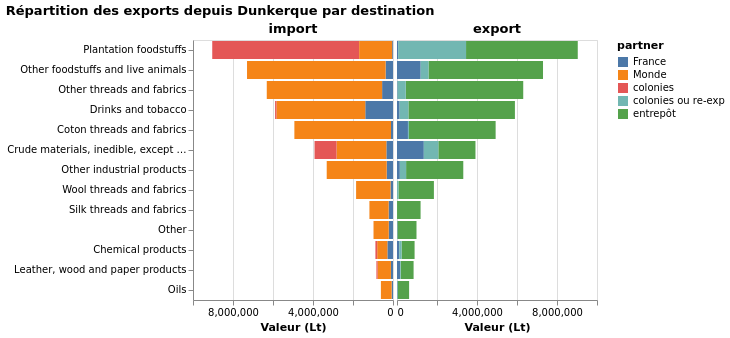

In [105]:
VegaLite({
  "title": "Répartition des exports depuis Dunkerque par destination",
  "data": {"values": report_dk},
  "spacing": 0,
  "hconcat": [{
    "transform": [{
      "filter": {"field": "group", "equal": "import"}
    }],
    "title": "import",
    "mark": "bar",
    "encoding": {
      "y": {
        "field": "product", "title": None, "sort": "-x"
      },
      "x": {
        "field": "value",
        "type": "quantitative",
        "title": "Valeur (Lt)",
          "sort": "descending"
      },
      "color": {
        "field": "partner",
      }
    }
  },
  {
    "transform": [{
      "filter": {"field": "group", "equal": "export"}
    }],
    "title": "export",
    "mark": "bar",
    "encoding": {
      "y": {
        "field": "product", "sort": "-x", "title": None, "axis": None

      },
      "x": {
        "field": "value",
        "type": "quantitative",
        "title": "Valeur (Lt)",
        "sort": "ascending"
      },
      "color": {
        "field": "partner",
      }
    }
  }
  ]
}
)

In [ ]:
"Javascript Error: Invalid specification {"view":{"stroke":null},"width":20}. Make sure the specification includes at least one of the following properties: "mark", "layer", "facet", "hconcat", "vconcat", "concat", or "repeat".